In [109]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [110]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer


In [111]:
!pip install pandas scikit-learn nltk
!pip install matplotlib pandas seaborn scikit-learn
import seaborn as sns



In [112]:
df_ = pd.read_csv('AirlineTweets.csv')
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [113]:
# Select only the columns 'text' and 'airline_sentiment'
df_ = df_[['text', 'airline_sentiment']]

# Display the first few rows to verify the result
print(df_.head())

                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative


In [114]:
inputs = df_['text']
labels = df_['airline_sentiment']
print(inputs)
print(labels)

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object
0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object


In [115]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
    inputs, labels, stratify=labels, random_state=123)

In [142]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Initialize the vectorizer and lemmatizer
vectorizer = CountVectorizer()
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [153]:

# Lemmatize and stem text function
def lemmatize_text(text):
    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back to string
    return ' '.join(lemmatized_tokens)

In [154]:
# Apply the lemmatization function to each element in the Series
inputs_train_lemmatized = inputs_train.apply(lemmatize_text)
inputs_test_lemmatized = inputs_test.apply(lemmatize_text)
print(inputs_train_lemmatized.head())
print(inputs_test_lemmatized.head())

10930    @ usairways he overflowed over the armrest and...
4181     @ united airline cancelled flight oc fll # fli...
14279    @ americanair they could be seen if your horri...
13895                  @ americanair 37 minute ? ? ? ? ? ?
11746    @ usairways told no gate open at # ord , neede...
Name: text, dtype: object
12620    @ americanair i 'm at the airport right now an...
343      @ virginamerica flight booking problem flight ...
4904     @ southwestair http : //t.co/oqukso3s2o subscr...
7212     @ jetblue will you cancelled flight tonight 's...
2022     @ united are you looking for european flight a...
Name: text, dtype: object


In [155]:
# Vectorize the lemmatized training data
Y_train_counts = vectorizer.fit_transform(inputs_train_lemmatized)
print(Y_train_counts.shape)

(10980, 11992)


In [156]:
# Transform the counts to TF-IDF
tfidf_transformer = TfidfTransformer()
Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)
print(Y_train_tfidf.shape)

(10980, 11992)


In [157]:
# Vectorize and transform the test data
Y_test_counts = vectorizer.transform(inputs_test_lemmatized)
Y_test_tfidf = tfidf_transformer.transform(Y_test_counts)
print(Y_test_tfidf.shape)

(3660, 11992)


In [158]:
# Fit the logistic regression model with increased max_iter
clf = LogisticRegression(C=0.75, max_iter=1000, class_weight='balanced').fit(Y_train_tfidf, Ytrain)

# Make predictions on the test set
predictions = clf.predict(Y_test_tfidf)

#Print the original text, lemmatized text, actual sentiment, and the corresponding predicted sentiment
for original_text, lemmatized_text, actual, predicted in zip(inputs_test, inputs_test_lemmatized, Ytest, predictions):
    print(f"Original Text: {original_text}\nLemmatized Text: {lemmatized_text}\nActual: {actual}, Predicted: {predicted}\n")

Streaming output truncated to the last 5000 lines.

Original Text: “@JetBlue: Our fleet's on fleek. http://t.co/FVYzjLDTON” 🚶🚶🚶🚶
Lemmatized Text: “ @ jetblue : our fleet 's on fleek . http : //t.co/fvyzjldton ” 🚶🚶🚶🚶
Actual: neutral, Predicted: neutral

Original Text: @AmericanAir Right. But more than two hours Late Flight, and it seems due to poor communication, which sounded like it was annoying on-plane staff
Lemmatized Text: @ americanair right . but more than two hour late flight , and it seems due to poor communication , which sounded like it wa annoying on-plane staff
Actual: negative, Predicted: negative

Original Text: @USAirways and when will one of these agents be available to speak?
Lemmatized Text: @ usairways and when will one of these agent be available to speak ?
Actual: negative, Predicted: negative

Original Text: @AmericanAir #AmericanAirlines says most bags left in Miami have been returned following mechanical glitch &gt;&gt; http://t.co/Ib8kyjBCJM
Lemmatized Text: @

ROC AUC Score: 0.9099834749862463
F1 Score: 0.792849006519171
Confusion Matrix:
 [[0.81691369 0.13077594 0.05231037]
 [0.16645161 0.71741935 0.11612903]
 [0.09306261 0.14720812 0.75972927]]

 



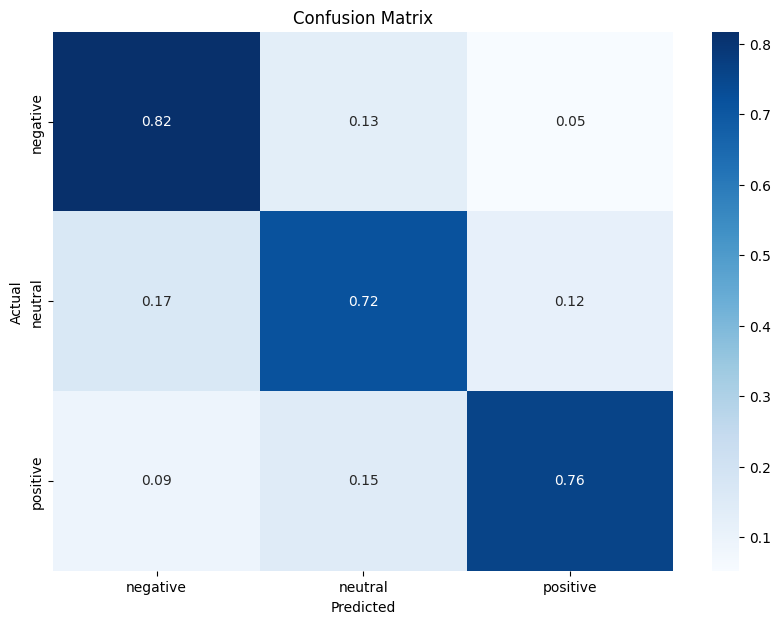

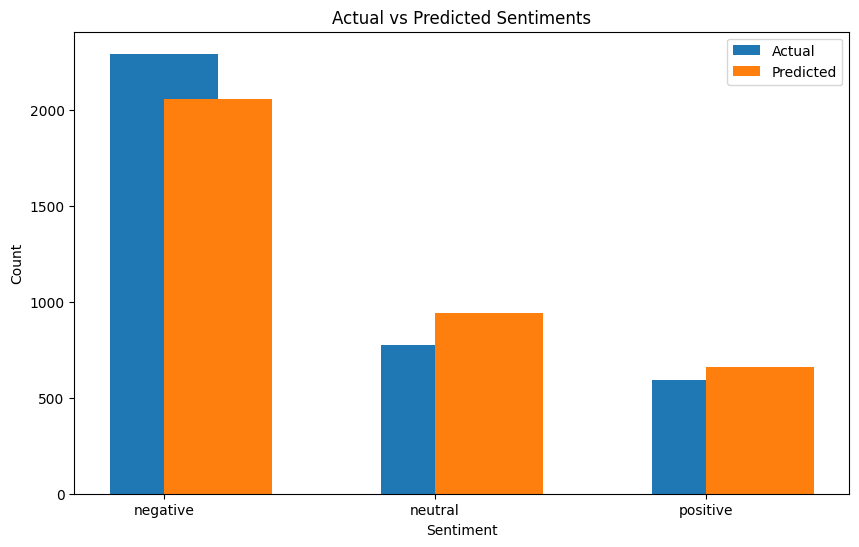

In [159]:
# Evaluate the model
roc_auc = roc_auc_score(Ytest, clf.predict_proba(Y_test_tfidf), multi_class='ovr')
f1 = f1_score(Ytest, predictions, average='weighted')
conf_matrix = confusion_matrix(Ytest, predictions, normalize='true')

print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

print('\n \n')

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot bar chart of actual vs predicted sentiments
fig, ax = plt.subplots(figsize=(10, 6))
actual_counts = pd.Series(Ytest).value_counts().sort_index()
predicted_counts = pd.Series(predictions).value_counts().sort_index()
width = 0.4

ax.bar(actual_counts.index, actual_counts.values, width, label='Actual', align='center')
ax.bar(predicted_counts.index, predicted_counts.values, width, label='Predicted', align='edge')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Sentiments')
ax.legend()

print('\n \n')

plt.show()